In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use("default")

df = pd.read_csv("../data/drafted_cleaned.csv")


In [24]:
#Creazione della colonna Tier
def assign_tier(ws):
    if ws >= 50:
        return "Star"
    elif ws >= 20:
        return "Starter"
    elif ws >= 5:
        return "Role Player"
    elif ws >= 0:
        return "Flop"
    else:
        return "N/A"  # in caso di WS = -100 (non disponibili)

df_val = df.copy()
df_val["WS_clean"] = df_val["WS"].replace(-100, np.nan)
df_val["Tier"] = df_val["WS_clean"].apply(assign_tier)
df_modern = df_val[df_val["DraftYear"] >= 1985]



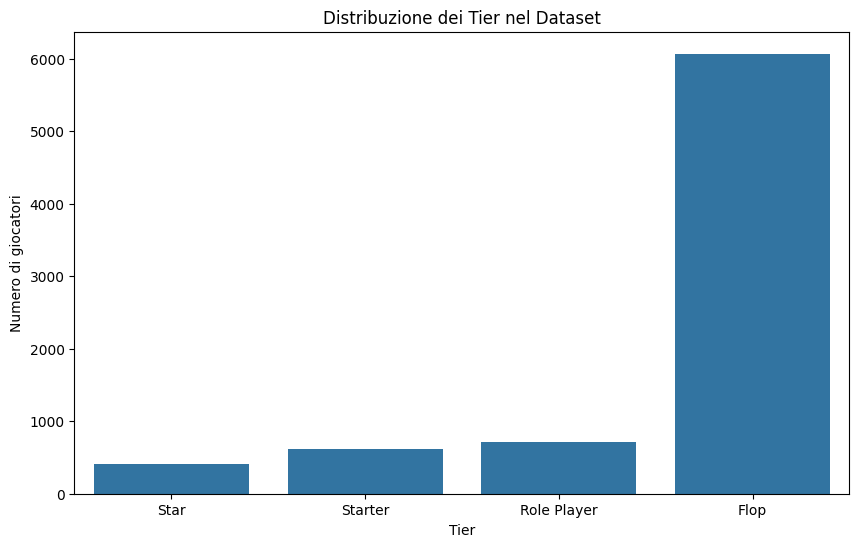

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_val, x="Tier", order=["Star","Starter","Role Player","Flop"])
plt.title("Distribuzione dei Tier nel Dataset")
plt.xlabel("Tier")
plt.ylabel("Numero di giocatori")
plt.show()


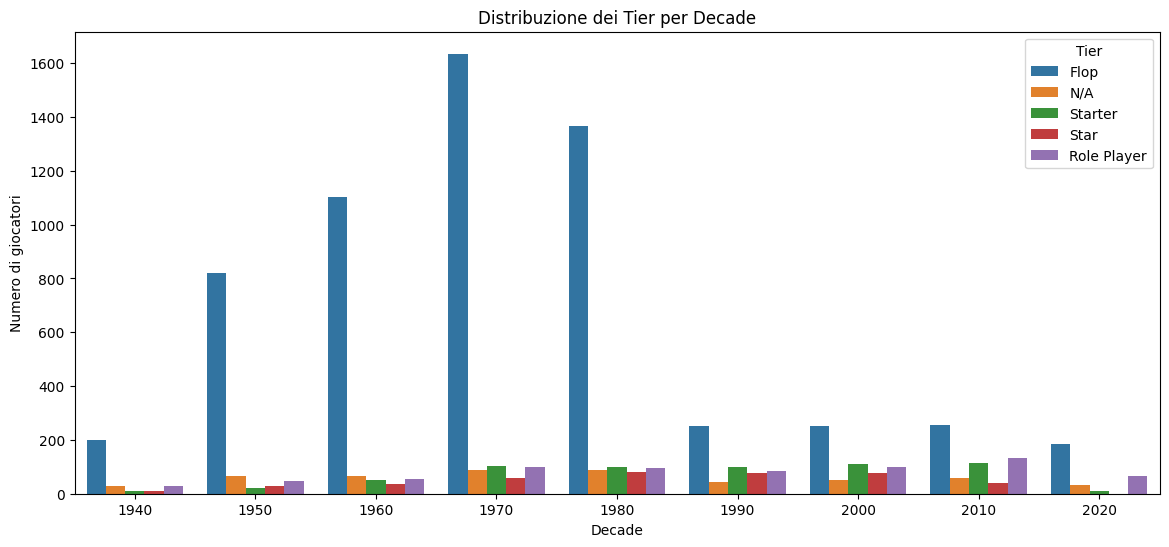

In [26]:
df_val["Decade"] = (df_val["DraftYear"] // 10) * 10

plt.figure(figsize=(14,6))
sns.countplot(data=df_val, x="Decade", hue="Tier",
              order=sorted(df_val["Decade"].unique()))
plt.title("Distribuzione dei Tier per Decade")
plt.xlabel("Decade")
plt.ylabel("Numero di giocatori")
plt.show()


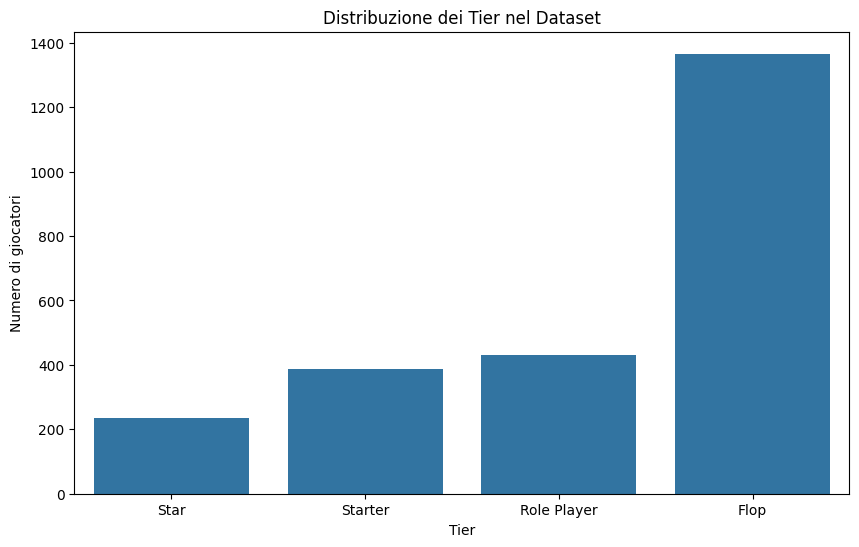

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_modern, x="Tier", order=["Star","Starter","Role Player","Flop"])
plt.title("Distribuzione dei Tier nel Dataset")
plt.xlabel("Tier")
plt.ylabel("Numero di giocatori")
plt.show()

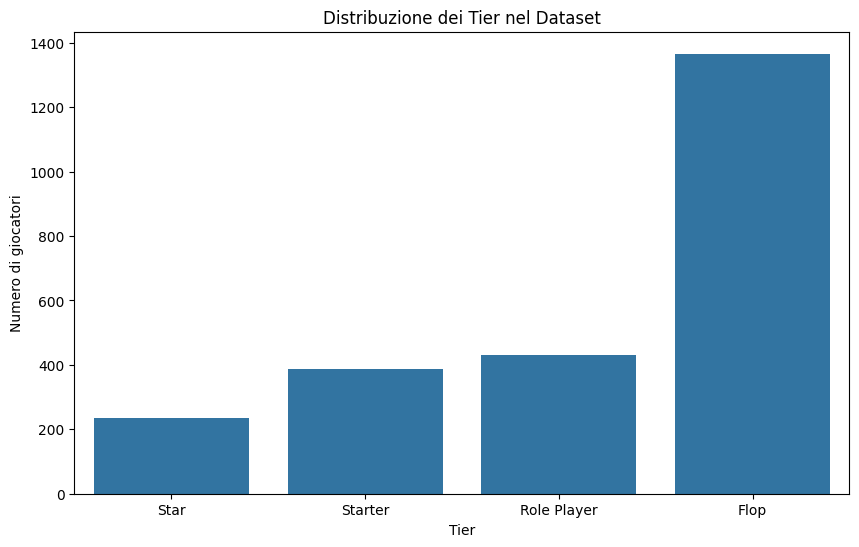

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_modern, x="Tier", order=["Star","Starter","Role Player","Flop"])
plt.title("Distribuzione dei Tier nel Dataset")
plt.xlabel("Tier")
plt.ylabel("Numero di giocatori")
plt.show()


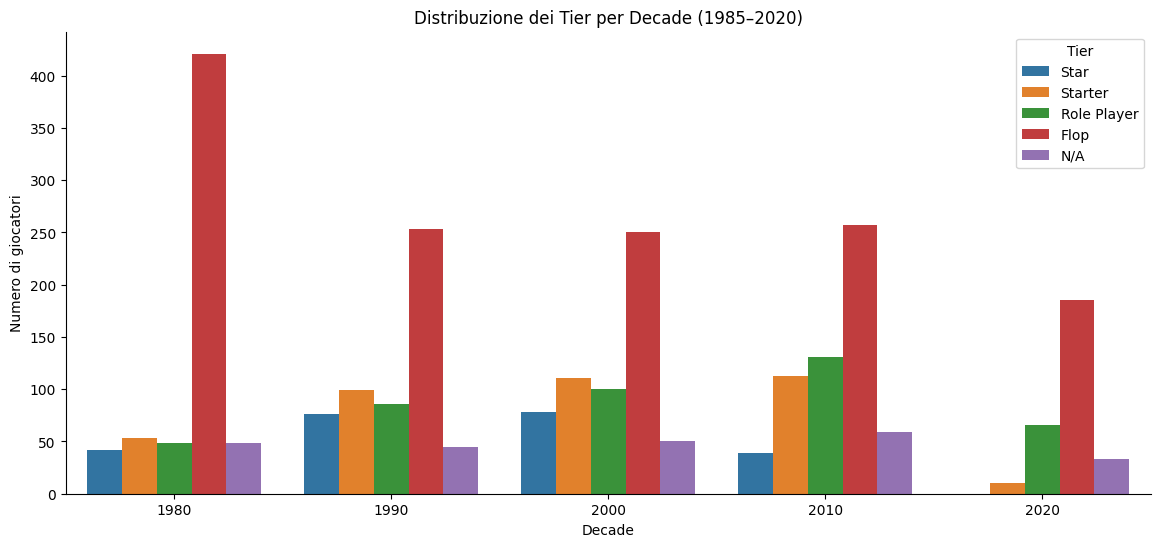

In [34]:
order_tier = ["Star", "Starter", "Role Player", "Flop", "N/A"]

plt.figure(figsize=(14,6))
sns.countplot(
    data=df_modern,
    x="Decade",
    hue="Tier",
    hue_order=order_tier,
    order=sorted(df_modern["Decade"].unique())
)
plt.title("Distribuzione dei Tier per Decade (1985–2020)")
plt.xlabel("Decade")
plt.ylabel("Numero di giocatori")
sns.despine()
plt.show()


In [29]:
longevity = df_val.groupby("Pick")["Seasons"].mean()


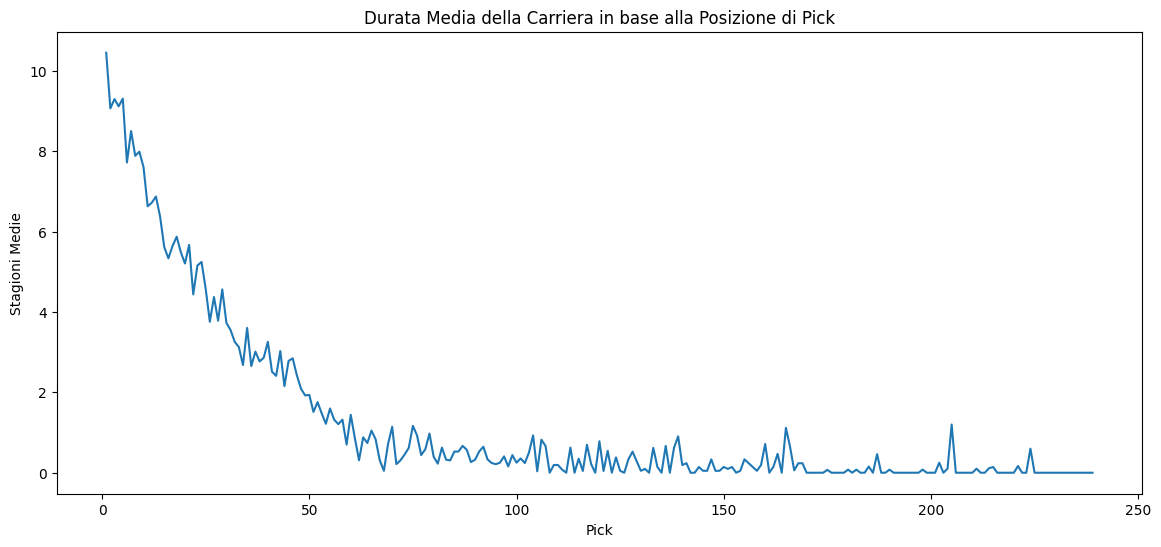

In [30]:
plt.figure(figsize=(14,6))
sns.lineplot(x=longevity.index, y=longevity.values)
plt.title("Durata Media della Carriera in base alla Posizione di Pick")
plt.xlabel("Pick")
plt.ylabel("Stagioni Medie")
plt.show()


In [37]:
def pick_group(p):
    if p <= 10:
        return "Top 10"
    elif p <= 30:
        return "First round"
    elif p <= 60:
        return "Second Round"
    else:
        return "Multi-round Era"

df_val["PickGroup"] = df_val["Pick"].apply(pick_group)

group_longevity = df_val.groupby("PickGroup")["Seasons"].mean()
print(group_longevity)


PickGroup
First round        5.253213
Multi-round Era    0.338457
Second Round       2.309785
Top 10             8.692308
Name: Seasons, dtype: float64


/var/folders/9m/m105xtks2r56v0bf4np7z4p40000gn/T/ipykernel_14315/431671203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_longevity.index, y=group_longevity.values, palette="viridis")


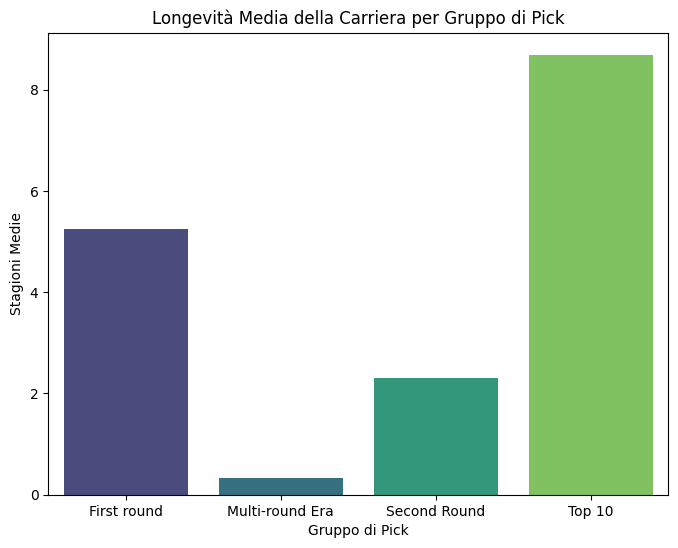

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x=group_longevity.index, y=group_longevity.values, palette="viridis")
plt.title("Longevità Media della Carriera per Gruppo di Pick")
plt.xlabel("Gruppo di Pick")
plt.ylabel("Stagioni Medie")
plt.show()
